In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from nltk.corpus import stopwords


In [2]:
import nltk
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\EdwinPark\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

In [4]:
sentences = list(movie_reviews.sents())

In [5]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [6]:
for i in range(len(sentences)):
    if ':' in sentences[i]:
        sentences[i].remove(':')
    if ',' in sentences[i]:
        sentences[i].remove(',')
    if '.' in sentences[i]:
        sentences[i].remove('.')

In [7]:
sentences[0]

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 'drink',
 'and',
 'then',
 'drive']

In [8]:
# Word2Vec 모델 만들기
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = window의 수
# workers = 학습 프로세스 반복횟수. 일반적으로 3~4를 준다고 함.
# min_count --> 분석에 대상이 되기 위한 단어의 최소 등장 수
# sg =0 -> C-BOW 1--> Skip-Gram 
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences,size=100, window=3,workers=4, min_count=5, sg=1)

model.init_sims(replace=True)

In [9]:
print(model.wv.similarity('actor', 'actress'))
print(model.wv.similarity('music', 'soundtrack'))
print(model.wv.similarity('soundtrack','writer'))

0.8458925
0.766176
0.40383852


In [10]:
model.wv.most_similar('happy')

[('afraid', 0.7911931276321411),
 ('safe', 0.7901939153671265),
 ('starting', 0.7792547941207886),
 ('sappy', 0.7748895883560181),
 ('thrilled', 0.7744821310043335),
 ('cruel', 0.7713103294372559),
 ('scared', 0.7645026445388794),
 ('sad', 0.762326717376709),
 ('pleased', 0.7612833380699158),
 ('lucky', 0.7580583095550537)]

## t-sne를 활용한 Word2Vec의 시각화

In [11]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

C:\Users\EdwinPark\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
C:\Users\EdwinPark\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


14793
[-0.00253694 -0.13934173 -0.08284816  0.00603838  0.0101188  -0.08061232
 -0.00081536 -0.01602142 -0.04955934 -0.00025091]


In [12]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [13]:
df.head(10)

,x,y
plot,-6.425488,65.476120
two,-60.862190,31.144960
teen,-48.809040,-42.149128
couples,-31.219641,23.637209
go,-14.547820,-9.648290
to,-86.529144,-23.080418
a,71.036797,16.222425
church,7.546319,-51.716209
party,-3.392802,-59.355572
drink,6.029438,-27.582796


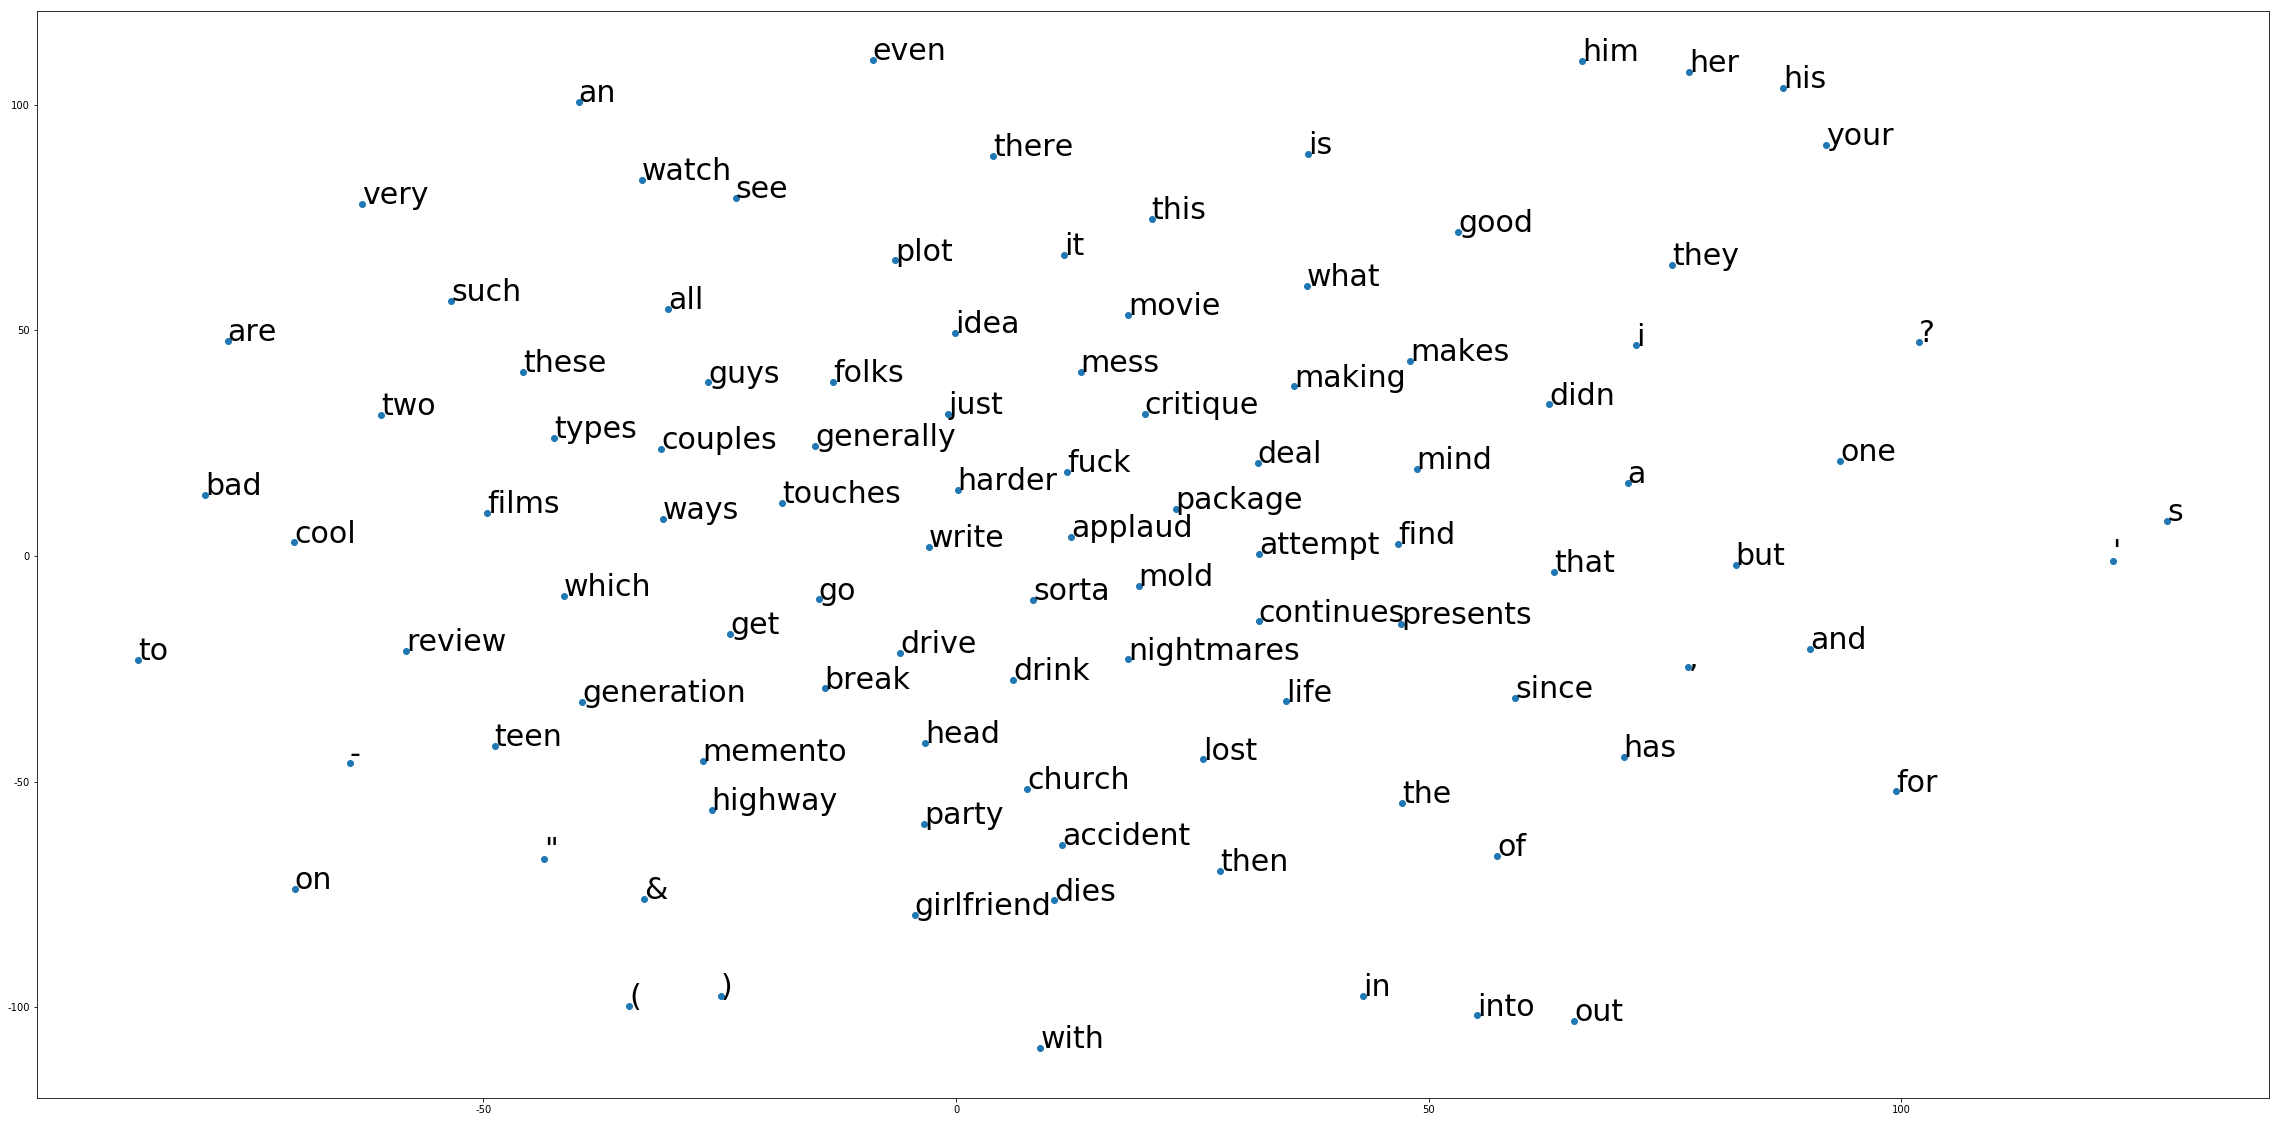

In [14]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()